We explicitly specify to use Tensorflow 1.x in case it is not compatible with future version, such as the coming 2.x version.


In [0]:
%tensorflow_version 1.x

Given, $x$, $y$, following code is to search for $A$ so that $y \leftarrow A \cdot x $, i.e. solve the equation $ y = A \cdot x$.




Step # 5, A = [[1.933563]]
Loss = 66.03800201416016
Step # 10, A = [[3.4214988]]
Loss = 42.69446563720703
Step # 15, A = [[4.627094]]
Loss = 29.56023597717285
Step # 20, A = [[5.606001]]
Loss = 16.869861602783203
Step # 25, A = [[6.397989]]
Loss = 11.856734275817871
Step # 30, A = [[7.0532517]]
Loss = 9.653852462768555
Step # 35, A = [[7.60169]]
Loss = 6.6807355880737305
Step # 40, A = [[8.043033]]
Loss = 5.4250006675720215
Step # 45, A = [[8.405809]]
Loss = 3.825944185256958
Step # 50, A = [[8.698574]]
Loss = 3.8297126293182373
Step # 55, A = [[8.937208]]
Loss = 1.6291965246200562
Step # 60, A = [[9.119432]]
Loss = 1.6070425510406494
Step # 65, A = [[9.292812]]
Loss = 1.434683084487915
Step # 70, A = [[9.425738]]
Loss = 1.299200177192688
Step # 75, A = [[9.513283]]
Loss = 1.7689692974090576
Step # 80, A = [[9.595922]]
Loss = 1.7287908792495728
Step # 85, A = [[9.684559]]
Loss = 1.194466233253479
Step # 90, A = [[9.74681]]
Loss = 1.1498348712921143
Step # 95, A = [[9.808308]]
Loss = 1.

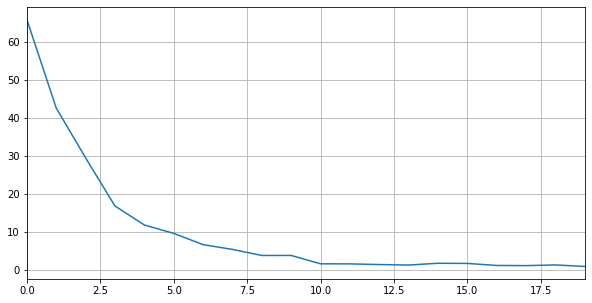

In [0]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import tensorflow as tf

batch_size = 20
x_vals = np.random.normal( 1, 0.1, 100 )
y_vals = np.repeat( 10., 100 )
x_data = tf.placeholder( shape = [ None, 1 ], dtype = tf.float32 )
y_target = tf.placeholder( shape = [ None, 1 ], dtype = tf.float32 )
A = tf.Variable( tf.random_normal( shape = [1,1] ) )
my_output = tf.matmul( x_data, A )
loss = tf.reduce_mean( tf.square( my_output - y_target ) )
my_opt = tf.train.GradientDescentOptimizer( 0.02 )
train_step = my_opt.minimize( loss )

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run( init )

loss_batch = []
for i in range( 100 ):
  rand_index = np.random.choice( 100, size = batch_size )
  rand_x = np.transpose( [ x_vals[ rand_index ] ] )
  rand_y = np.transpose( [ y_vals[ rand_index ] ] )
  sess.run( train_step, feed_dict = {x_data: rand_x, y_target: rand_y })
  if (i + 1)%5 == 0:
    print( 'Step # {}, A = {}'.format( i + 1, sess.run( A ) ) )
    temp_loss = sess.run( loss, feed_dict = {x_data: rand_x, y_target: rand_y } )
    print( 'Loss = {}'.format( temp_loss ) )
    loss_batch.append( temp_loss )

sess.close()

pd.Series( loss_batch, index = list( range(20)) ).plot( figsize=(10,5), grid = True )



Step # 5, A = [[1.1889912]]
Loss = 78.41285705566406
Step # 10, A = [[2.798057]]
Loss = 51.47438430786133
Step # 15, A = [[4.1219893]]
Loss = 34.98993682861328
Step # 20, A = [[5.198461]]
Loss = 22.870840072631836
Step # 25, A = [[6.0709543]]
Loss = 15.542501449584961
Step # 30, A = [[6.787315]]
Loss = 11.61255931854248
Step # 35, A = [[7.370566]]
Loss = 8.625094413757324
Step # 40, A = [[7.820683]]
Loss = 4.378604888916016
Step # 45, A = [[8.213577]]
Loss = 4.866068363189697
Step # 50, A = [[8.521103]]
Loss = 3.2977027893066406
Step # 55, A = [[8.780365]]
Loss = 3.226734161376953
Step # 60, A = [[9.001888]]
Loss = 2.969587564468384
Step # 65, A = [[9.175448]]
Loss = 2.2117209434509277
Step # 70, A = [[9.317888]]
Loss = 1.559459924697876
Step # 75, A = [[9.415998]]
Loss = 1.685811996459961
Step # 80, A = [[9.505699]]
Loss = 1.438134789466858
Step # 85, A = [[9.601571]]
Loss = 1.5183993577957153
Step # 90, A = [[9.686555]]
Loss = 1.056024193763733
Step # 95, A = [[9.73366]]
Loss = 0.925

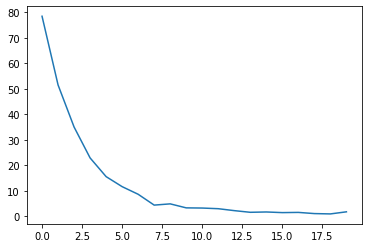